# Sail Simulator



In [46]:
import process as p
import numpy as np

from nbutils import display_markdown, display

import nbutils

import matplotlib.pyplot as plt

In [43]:
class Vec:
    def __init__(self, angle, speed):
        # By default a "TO vector"
        self.v = np.array([speed * p.north_d(angle), speed * p.east_d(angle)])
        
    @staticmethod
    def vec_from(heading, speed):
        "By convention winds/currents that comes from the north are vectors pointing south."
        return Vec(heading, -speed)
    
    @staticmethod
    def vec_to(heading, speed):
        "By convention a boats heading is the direction it is heading."
        return Vec(heading, speed)
    
    @property
    def north(self):
        return self.v[0]
    
    @property
    def east(self):
        return self.v[1]
    
    @property
    def length(self):
        return np.linalg.norm(self.v)
    
    def heading_from(self):
        return np.degrees(np.arctan2(-self.east, -self.north))

    def heading_to(self):
        return np.degrees(np.arctan2(self.east, self.north))

    def polar_from(self):
        return self.heading_from(), self.length

    def polar_to(self):
        return self.heading_to(), self.length

    def __str__(self):
        return f"<Vector: {self.length} at {self.heading_to()}>"
    
    def __repr__(self):
        return str(self)
        

In [44]:
v1 = vec.vec_from(0, 10)

v1

<Vector: 10.0 at -180.0>

In [45]:
    
def arrow(pos, vec, color):
    return plt.arrow(pos.east, pos.north, vec.east, vec.north, 
                     head_width=0.5, head_length=1.0, fc=color, ec=color, length_includes_head=True)

def fig(d):
    plt.figure()
    plt.axis([-d, d, -d, d])

    

<IPython.core.display.Javascript object>


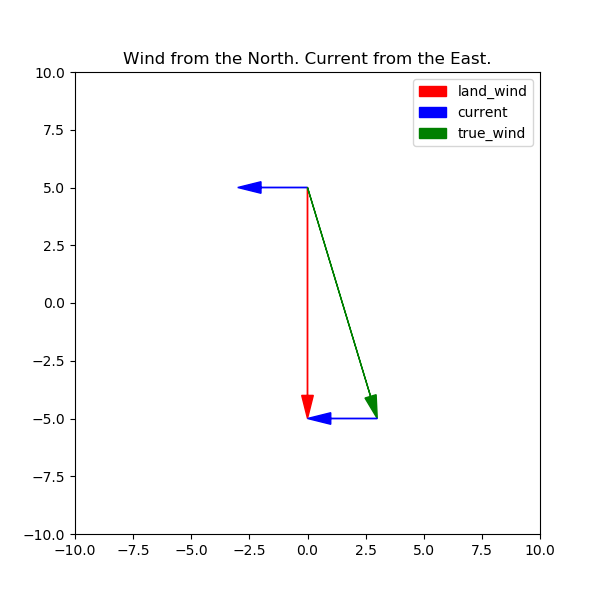

Text(0.5, 1.0, 'Wind from the North. Current from the East.')

In [19]:
# Land wind
lwa = 0  # From the North or 0 degrees
lws = 10

land_wind = Vec.vector_from(lwa, lws)


# Current
curangle = 90  # From the East or 90 degrees
curspeed = 3
    
current = vector_from(curangle, curspeed)

# True Wind (which is sometimes/rarely called water wind)
tw_v = lw_v - cur_v


        
# Visualize the vectors.      
pos = np.array([5, 0])
fig(10)
aa = []
aa.append(arrow(pos, lw_v, 'r'))
aa.append(arrow(pos, cur_v, 'b'))
aa.append(arrow(pos, tw_v, 'g'))
npos = pos + lw_v - cur_v
arrow(npos, cur_v, 'b')
plt.legend(aa, "land_wind current true_wind".split())
plt.title("Wind from the North. Current from the East.")



display_markdown(""

In [8]:
def heading_from(vec):
    return np.degrees(np.arctan2(-east(vec), -north(vec)))

def polar_from(vec):
    return heading_from(vec), np.linalg.norm(vec)

def heading_to(vec):
    return heading_from(-vec)

def polar_to(vec):
    return heading_to(vec), np.linalg.norm(vec)
    
    
display(polar_from(lw_v))
display(polar_from(cur_v))
display(polar_from(tw_v))


(0.0, 10.0)

(90.0, 3.0)

(-16.69924423399362, 10.44030650891055)

<IPython.core.display.Javascript object>


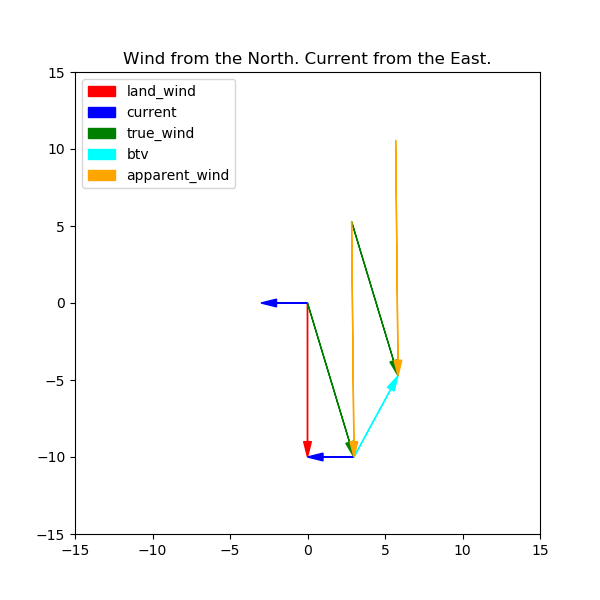

Text(0.5, 1.0, 'Wind from the North. Current from the East.')

In [16]:
twd, tws = polar_from(tw_v)

btv = vector_to(twd+45, 6)

# Visualize the vectors.      
pos = np.array([0, 0])
plt.figure()
d = 15
plt.axis([-d, d, -d, d])
aa = []
aa.append(arrow(pos, lw_v, 'r'))
aa.append(arrow(pos, cur_v, 'b'))
aa.append(arrow(pos, tw_v, 'g'))
npos = pos + lw_v - cur_v
arrow(npos, cur_v, 'b')


aa.append(arrow(npos, btv, 'cyan'))

# copy of the true wind vector
arrow(npos + btv - tw_v, tw_v, 'g')

awv = tw_v - btv  # apparent wind vector

aa.append(arrow(npos + btv - tw_v, awv, 'orange'))

nnpos = npos+btv
# Copy of apparent wind vector
aa.append(arrow(nnpos - awv, awv, 'orange'))

plt.legend(aa, "land_wind current true_wind btv apparent_wind".split(), loc='upper left')
plt.title("Wind from the North. Current from the East.")


In [ ]:
# From these vectors we can compute the AWA/AWS/TWA etc.

# AWA is the angle between 
